Рубежный контроль №2

Платонов Антон РТ5-61Б¶

       Метод 1 	           Метод 2
Метод опорных векторов 	Случайный лес

In [1]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv',sep=',')

In [3]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.shape

(500, 9)

In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Построим Корреляционную матрицу для определения взаимосвязей между признаками

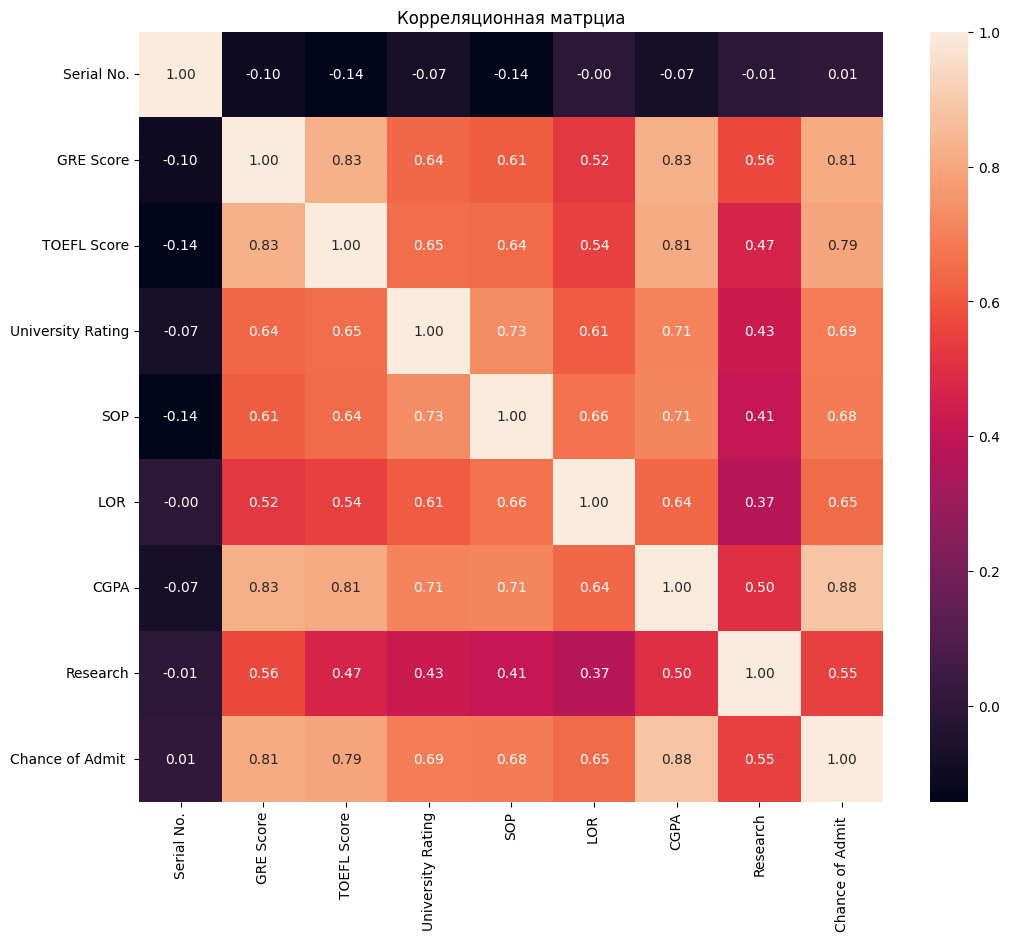

In [7]:
num_data = df[df.select_dtypes(include=['int64', 'float64']).columns]
correlation_matrix = num_data.corr()
# Визуализация тепловой карты корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Корреляционная матрциа')
plt.show()

Разделяем данные на обучающую и тестовую выборки

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Chance of Admit ',axis=1),df['Chance of Admit '],test_size=0.2, random_state=42)

Обучение моделей

Метод опорных векторов

In [9]:
# Создание и обучение модели SVR
svr_model = SVR(kernel='rbf')  # Используем RBF ядро (радиально-базисная функция)
svr_model.fit(X_train, y_train)

SVR()

In [10]:
y_pred_svr = svr_model.predict(X_test)
# Оценка качества модели SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR Mean Squared Error (MSE): {mse_svr}")
print(f"SVR R-squared (R2): {r2_svr}")

SVR Mean Squared Error (MSE): 0.007776240810141063
SVR R-squared (R2): 0.6197437256654738


Случайный лес

In [11]:
# Создание и обучение модели RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Предсказание на тестовой выборке
y_pred_rf = rf_model.predict(X_test)

In [13]:
# Оценка качества модели
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest R-squared (R2): {r2_rf}")

Random Forest Mean Squared Error (MSE): 0.003324635199999999
Random Forest R-squared (R2): 0.8374261515892422


In [15]:
print(f"SVR модель имеет MSE: {mse_svr} и R2: {r2_svr}")
print(f"Random Forest модель имеет MSE: {mse_rf} и R2: {r2_rf}")

SVR модель имеет MSE: 0.007776240810141063 и R2: 0.6197437256654738
Random Forest модель имеет MSE: 0.003324635199999999 и R2: 0.8374261515892422


Выводы

На основании метрик MSE и R2 мы можем сделать выводы о качестве моделей:

1. Среднеквадратическая ошибка (MSE): Позволяет оценить среднюю ошибку предсказаний (насколько сильно предсказанные значения отклоняются от истинных значений). Чем меньше значение, тем лучше модель.
2. R-squared (коэффициент детерминации) (R2): Показывает, какая доля дисперсии в целевой переменной объясняется моделью (насколько хорошо модель соответствует фактическим данным). Чем ближе значение к 1, тем лучше модель объясняет данные.

Сравнив значения MSE и R2 для обеих моделей, мы можем определить, какая модель лучше предсказывает 'Chance of Admit' (шанс зачисления). Можем увидеть, что модель Random Forest имеет меньшую среднеквадратичную ошибку (MSE), следовательно, она лучше предсказывает 'Chance of Admit'. Также, модель Random Forest имеет больший коэффициент детерминации (R2), следовательно, она лучше объясняет дисперсию целевой переменной.

По итогу, модель Random Forest (случайный лес) оказалась более эффективной по сравнению с SVM (методом опорных векторов).